In [5]:
# import the pysb module and all its methods and functions
from pysb import *

# instantiate a model
Model()

# declare monomers
Monomer('C8', ['b'])
Monomer('Bid', ['b', 'S'], {'S':['u', 't']})

# input the parameter values
Parameter('kf', 1.0e-07)
Parameter('kr', 1.0e-03)
Parameter('kc', 1.0)

# now input the rules
Rule('C8_Bid_bind', C8(b=None) + Bid(b=None, S=None) | C8(b=1) % Bid(b=1, S=None), kf, kr)
Rule('tBid_from_C8Bid', C8(b=1) % Bid(b=1, S='u') >> C8(b=None) + Bid(b=None, S='t'), kc)

# Observables
Observable('obsC8', C8(b=None))
Observable('obsBid', Bid(b=None, S='u'))
Observable('obstBid', Bid(b=None, S='t'))

# Initial conditions
Parameter('C8_0', 1000)
Parameter('Bid_0', 10000)
Initial(C8(b=None), C8_0)
Initial(Bid(b=None, S='u'), Bid_0)

In [6]:
from pysb.simulator import ScipyOdeSimulator
from numpy import linspace

t = linspace(0, 20000)
simres = ScipyOdeSimulator(model, tspan = t).run()
yout = simres.all

Text(0,0.5,'Molecules/cell')

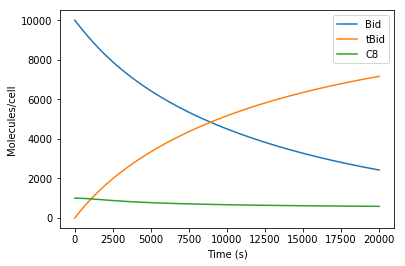

In [7]:
%matplotlib inline
from matplotlib.pyplot import plot, legend, xlabel, ylabel
plot(t, yout['obsBid'], label = "Bid")
plot(t, yout['obstBid'], label = "tBid")
plot(t, yout['obsC8'], label = "C8")
legend()
xlabel("Time (s)")
ylabel("Molecules/cell")